In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import gc

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 600)

# Objective of this contest:
Classify consumers according to their appetite to subscribe to Netflix.
For reasons of confidentiality, the data is anonymized and augmented.

In [2]:
train = pd.read_csv('../input/netflix-appetency/train.csv')
test = pd.read_csv('../input/netflix-appetency/test.csv')
print(train.shape)
print(test.shape)

sub = pd.read_csv('../input/netflix-appetency/sample_submission.csv')

(70000, 509)
(30000, 508)


In [3]:
train.head(7)

,id,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature

In [4]:
train.drop('id', axis = 1).duplicated().sum()

1

In [5]:
test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature_341,fe

In [6]:
df = pd.concat([train, test])
print(df.shape)

(100000, 509)


# EDA

In [7]:
def eda(df):
    summary = pd.DataFrame(df.dtypes)
    summary['miss'] = df.isnull().sum()
    summary['level'] = df.nunique()
    return summary

s = eda(df)
s

,0,miss,level
id,int64,0,100000
target,float64,30000,2
feature_0,object,0,2
feature_1,object,0,2
feature_2,object,0,6
...,...,...,...
feature_502,int64,0,1
feature_503,int64,0,2
feature_504,int64,0,2
feature_505,int64,0,1


# Date Columns

In [8]:
datecols = ['feature_'+str(i) for i in range(191, 205)]
datecols
for c in datecols:
    df[c] = pd.to_datetime(df[c])

# Drop columns with one value

In [9]:
one_value_cols = [col for col in df.columns if df[col].nunique() <= 1]
#one_value_cols

In [10]:
df = df.drop(one_value_cols, axis = 1)
print(df.shape)

(100000, 448)


In [11]:
df.target.value_counts(dropna = False)

0.0    49127
NaN    30000
1.0    20873
Name: target, dtype: int64

# Columns with missing values

In [12]:
df.columns[df.isnull().any()]

Index(['target', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_60', 'feature_67', 'feature_68', 'feature_75',
       'feature_76', 'feature_81', 'feature_83', 'feature_84', 'feature_85',
       'feature_86', 'feature_88', 'feature_89', 'feature_90', 'feature_91',
       'feature_92', 'feature_93', 'feature_94', 'feature_95', 'feature_96',
       'feature_128', 'feature_129', 'feature_130', 'feature_131',
       'feature_132', 'feature_153', 'feature_154', 'feature_155',
       'feature_156', 'feature_157', 'feature_158', 'feature_159',
       'feature_160', 'feature_161', 'feature_162', 'feature_172',
       'feature_191', 'feature_192', 'feature_194', 'feature_195',
       'feature_200', 'feature_201', 'feature_202', 'feature_203',
       'feature_204', 'feature_206', 'feature_207', 'feature_208',
 

# Correlation analysis
- Test set has new feature level

In [13]:
corr = train.drop(one_value_cols, axis = 1).sample(10000).corr( method = 'spearman')['target'].sort_values(ascending = False).reset_index()
corr[:20]

,index,target
0,target,1.000000
1,feature_307,0.338622
2,feature_297,0.161181
3,feature_264,0.143612
4,feature_169,0.130279
5,feature_86,0.114501
6,feature_470,0.113949
7,feature_298,0.111879
8,feature_254,0.109833
9,feature_263,0.106817


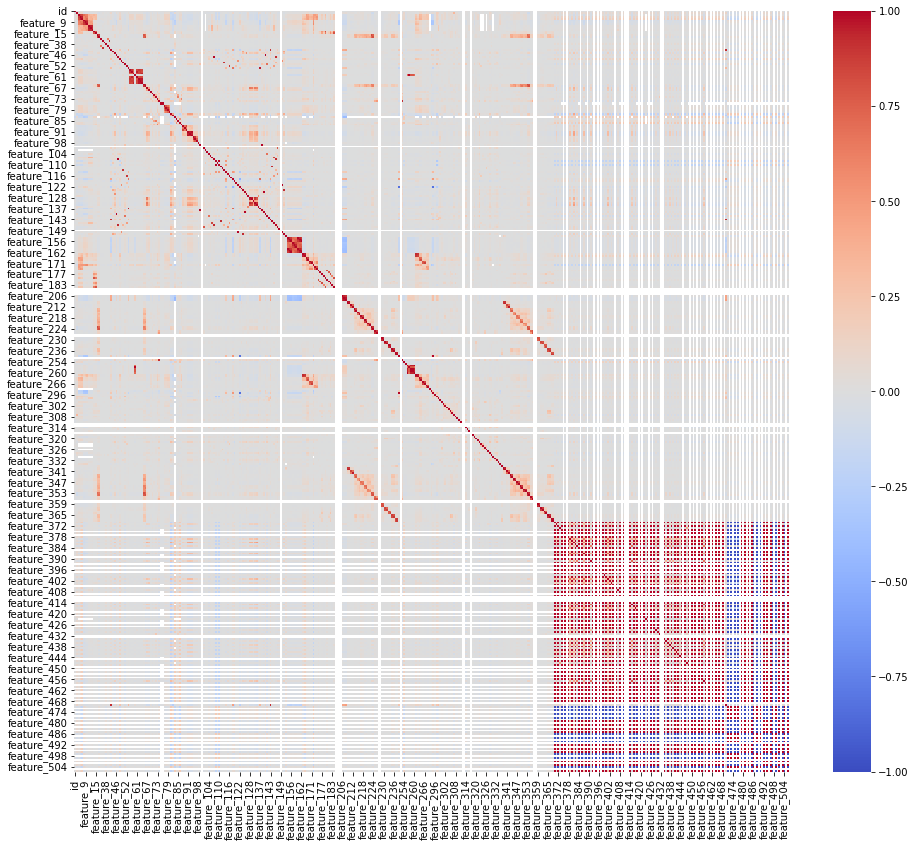

In [14]:
plt.figure(figsize = (16,14))
sns.heatmap(train.sample(10000).corr(), cmap = 'coolwarm')
plt.show()

In [15]:
catcols = df.select_dtypes(include = 'object').columns

In [16]:
datecols2 = df.select_dtypes(include = 'datetime').columns
datecols2

Index(['feature_191', 'feature_192', 'feature_194', 'feature_195',
       'feature_199', 'feature_200', 'feature_201', 'feature_202',
       'feature_203', 'feature_204'],
      dtype='object')

In [17]:
df.select_dtypes(include = 'datetime')

,feature_191,feature_192,feature_194,feature_195,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204
0,2017-11-10,2017-11-10,2017-09-11,NaT,2017-11-10,NaT,2017-11-10,NaT,NaT,NaT
1,2015-03-25,2015-03-25,NaT,NaT,2017-02-04,2015-03-25,2015-03-25,NaT,NaT,2015-03-25
2,2015-01-27,2015-01-27,2017-05-13,NaT,2016-03-24,2015-01-27,2015-01-27,NaT,NaT,2015-01-27
3,2014-05-02,2014-01-04,NaT,2014-03-19,2014-01-04,2014-01-04,2014-01-04,2014-03-31,2014-03-31,2014-05-02
4,2009-07-20,2013-10-09,2017-02-14,NaT,2013-10-09,2016-01-24,2013-10-09,2016-01-24,2013-10-09,2011-03-23
...,...,...,...,...,...,...,...,...,...,...
29995,2002-01-09,2013-08-24,NaT,NaT,2016-01-06,2015-12-17,2015-12-17,2015-12-30,2015-12-30,2015-12-17
29996,2016-04-03,2016-04-03,NaT,NaT,2016-04-03,2016-04-03,2016-04-03,2018-04-01,NaT,NaT
29997,2008-03-20,2014-02-19,2017-12-09,NaT,2016-08-11,2014-02-25,2016-08-11,2014-02-25,NaT,2014-02-19
29998,2013-09-17,NaT,2017-11-09,2014-04-18,2017-06-06,2016-05-12,2014-04-18,2016-05-12,NaT,2014-04-18


In [18]:
# for c in datecols2:
#     df[c +'_dow'] = df[c].dt.dayofweek
#     df[c + '_month'] = df[c].dt.month

In [19]:
df.head()

,id,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_189,feature_191,feature_192,feature_194,feature_195,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_249,feature_250,feature_251,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature_341,feature_342,feature_343,feature_344,feature_345,feature_346,feature_347,feature_348,feature_349,feature_350,feature_351,feature_352,feature_353,feature_354,feature_355,feature_356,featur

# More EDA

In [20]:
nans_df = train.isna()
nans_groups={}

for col in train.columns:
    cur_group = nans_df[col].sum()
    try:
        nans_groups[cur_group].append(col)
    except:
        nans_groups[cur_group]=[col]
        
del nans_df; x=gc.collect()

for k,v in nans_groups.items():
    if k>0:
        print('####### NAN count =',k)
        print(v)

####### NAN count = 44576
['feature_5', 'feature_8', 'feature_11']
####### NAN count = 43611
['feature_6', 'feature_9', 'feature_12']
####### NAN count = 42208
['feature_7', 'feature_10', 'feature_13']
####### NAN count = 85
['feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_96']
####### NAN count = 1452
['feature_60', 'feature_156', 'feature_159', 'feature_162', 'feature_208', 'feature_256', 'feature_259', 'feature_260']
####### NAN count = 411
['feature_67', 'feature_68', 'feature_88', 'feature_90', 'feature_91', 'feature_92', 'feature_94', 'feature_128', 'feature_129', 'feature_130', 'feature_254']
####### NAN count = 49208
['feature_75', 'feature_76']
####### NAN count = 159
['feature_81', 'feature_191']
####### NAN count = 68824
['feature_83']
####### NAN count = 41650
['feature_84', 'feature_85', 'feature_86']
####### NAN count = 382
['feature_89', 'feature_93', 'feature_131', 'feature_132']
####### NAN count = 98
['feature_95']
####### 

## ['feature_5', 'feature_8', 'feature_11']


In [21]:
Vs = nans_groups[44576]

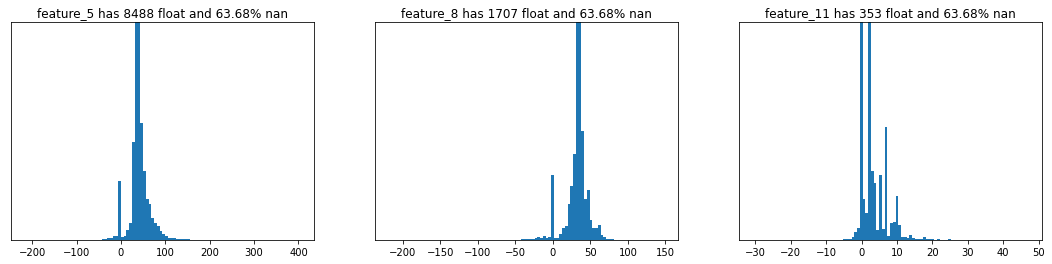

In [22]:
def make_plots(Vs):
    col = 4
    row = len(Vs)//4+1
    plt.figure(figsize=(25,row*4))
    idx = train[~train[Vs[0]].isna()].index
    for i,v in enumerate(Vs):
        plt.subplot(row,col,i+1)
        n = train[v].nunique()
        x = np.sum(train.loc[idx,v]!=train.loc[idx,v].astype(int))
        y = np.round(100*np.sum(train[v].isna())/len(train),2)
        t = 'int'
        if x!=0: t = 'float'
        plt.title(v+' has '+str(n)+' '+t+' and '+str(y)+'% nan')
        plt.yticks([])
        h = plt.hist(train.loc[idx,v],bins=100)
        if len(h[0])>1: plt.ylim((0,np.sort(h[0])[-2]))
    plt.show()
make_plots(Vs)

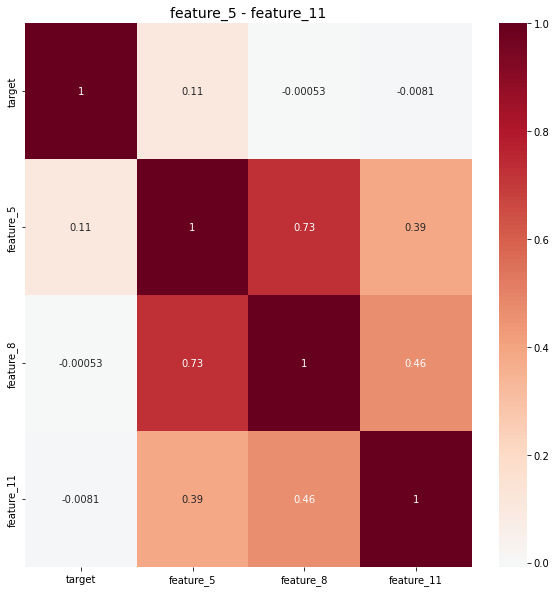

In [23]:
def make_corr(Vs):
    cols = ['target'] + Vs
    plt.figure(figsize=(10,10))
    sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)    
    plt.title(Vs[0]+' - '+Vs[-1],fontsize=14)
    plt.show()
make_corr(Vs)

In [24]:
grps = [[1],[5,8],[11]]
def reduce_group(grps,c='feature_'):
    use = []
    for g in grps:
        mx = 0; 
        vx = g[0]
        for gg in g:
            n = train[c+str(gg)].nunique()
            if n>mx:
                mx = n
                vx = gg
            #print(str(gg)+'-'+str(n),', ',end='')
        use.append(vx)
        #print()
    print('Use these',use)
    
reduce_group(grps)

Use these [1, 5, 11]


## ['feature_6', 'feature_9', 'feature_12']


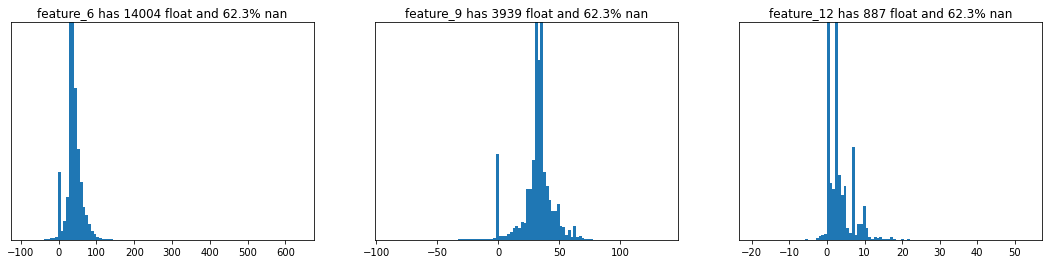

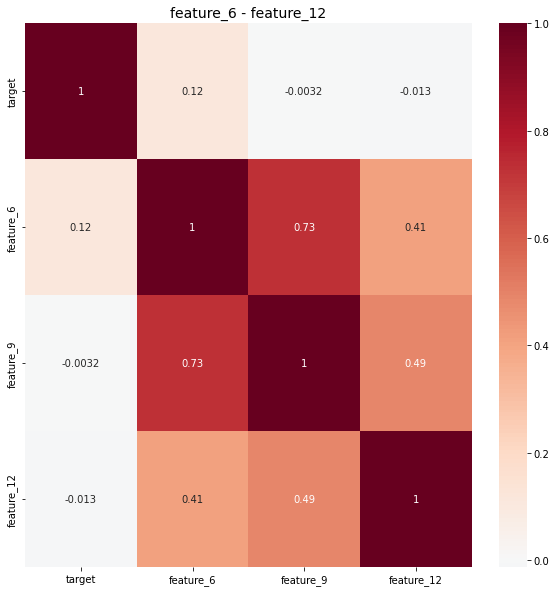

In [25]:
Vs = nans_groups[43611]
make_plots(Vs)
make_corr(Vs)

In [26]:
grps = [[6,9],[12]]
reduce_group(grps)

Use these [6, 12]


## ['feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_96']


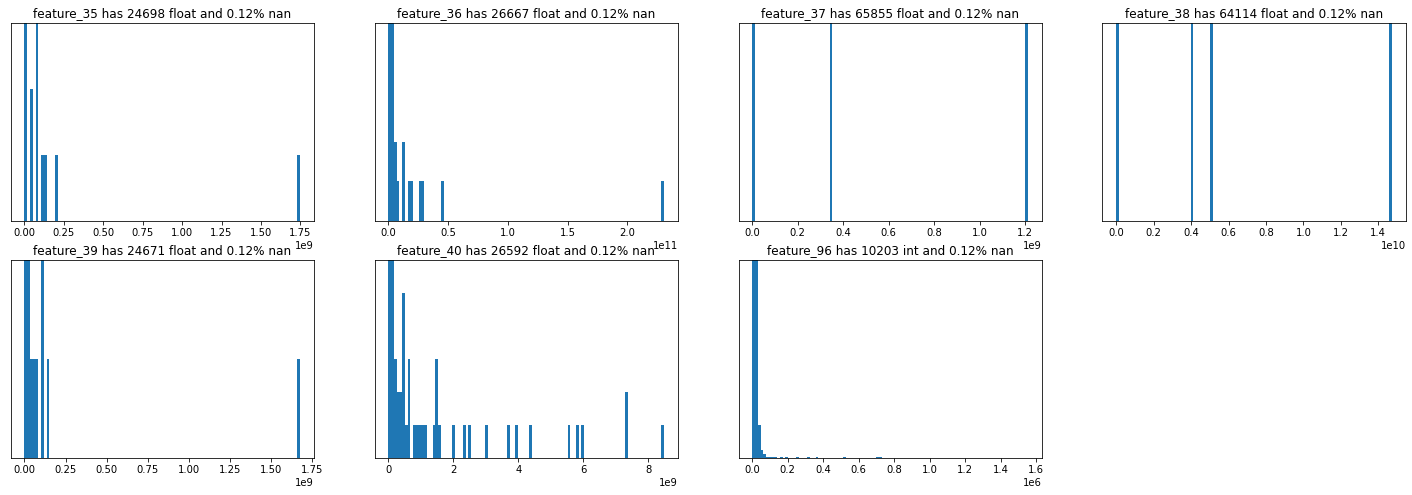

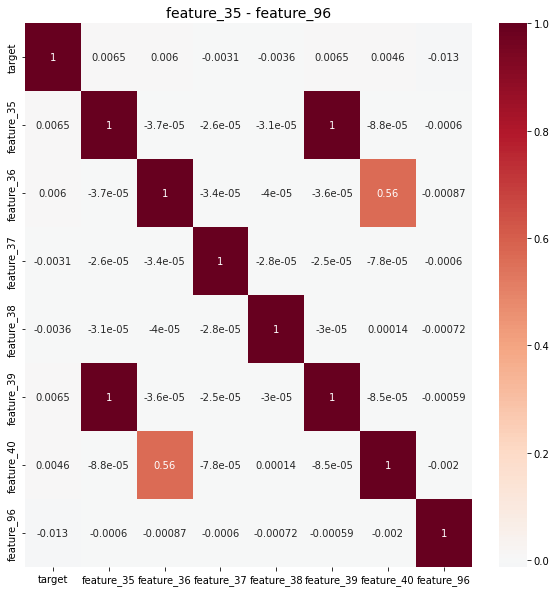

In [27]:
Vs = nans_groups[85]
make_plots(Vs)
make_corr(Vs)

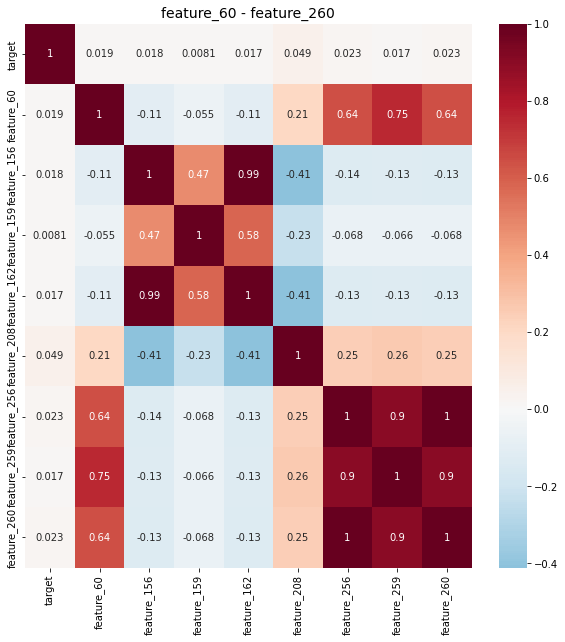

In [28]:
Vs = nans_groups[1452]
#make_plots(Vs)
make_corr(Vs)

In [29]:
grps = [[60],[156,159,162],[208],[256,259,260]]
reduce_group(grps)

Use these [60, 162, 208, 260]


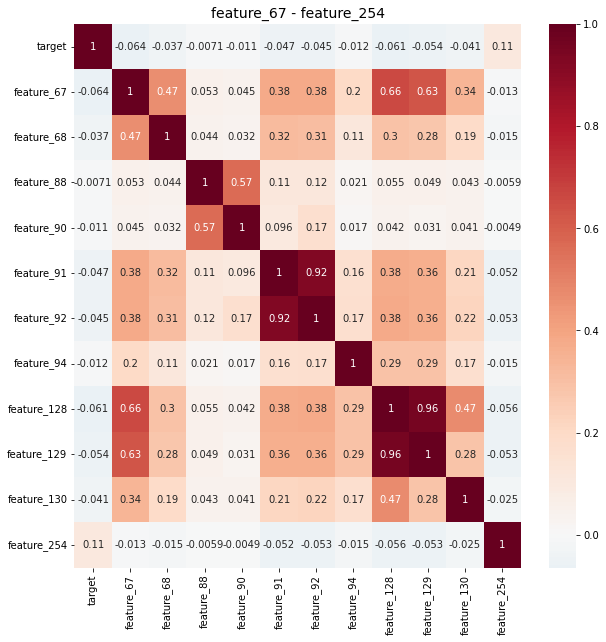

In [30]:
Vs = nans_groups[411]
#make_plots(Vs)
make_corr(Vs)

In [31]:
grps = [[67,68],[88,90],[91,92],[94],[128,129],[130],[254]]
reduce_group(grps)

Use these [68, 88, 91, 94, 128, 130, 254]


# Drop columns with high correlation
Getting the upper triangle of correlations


In [32]:
# Getting the upper triangle of correlations
threshold = 0.9
corr_matrix = df.drop(['id','target'], axis = 1).sample(20000).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
to_drop[:10]

['feature_7',
 'feature_10',
 'feature_12',
 'feature_13',
 'feature_39',
 'feature_61',
 'feature_63',
 'feature_64',
 'feature_66',
 'feature_76']

In [33]:
upper

,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_25,feature_26,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_56,feature_57,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_98,feature_99,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_150,feature_151,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_245,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_339,feature_340,feature_341,feature_342,feature_343,feature_344,feature_345,feature_346,feature_347,feature_348,feature_349,feature_350,feature_351,feature_352,feature_353,feature_354,feature_355,feature_356,feature_359,feature_360,feature_361,feature_362,feature_363,feature_364,feature_365,feature_366,feature_367,feature_368,feature_369,feature_370,feature_372,feature_373,feature_374,feature_376,feature_378,feature_379,feature_380,feature_381,feature_382,feature_383,feature_384,feature_386,feature_387,feature_388,feature_390,feature_391,feature_392,feature_393,feature_394,feature_396,feature_398,feature_399,feature_400,feature_401,feature_402,feature_403,feature_404,feature_406,feature_407,feature_408,feature_410,feature_414,feature_415,feature_416,feature_417,feature_418,feature_420,feature_422,feature_423,feature_424,feature_426,feature_428,feature_429,feature_430,feature_431,feature_434,feature_435,feature_436,feature_437,feature_438,feature_439,feature_440,feature_441,feature_442,feature_443,feature_444,feature_446,feature_447,feature_448,feature_450,feature_452,feature_453,feature_454,feature_456,feature_457,feature_458,feature_460,feature_462,feature_464,feature_466,feature_468,feature_470,feature_

In [34]:
df = df.drop(to_drop, axis = 1)
print(df.shape)

(100000, 318)


# Pre-processing

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

for c in catcols:
    if c not in datecols2:
        df[c] = le.fit_transform(df[c])

In [36]:
train = df[:len(train)]
test = df[-len(test):]

X_train = train.drop(['id','target'] + list(datecols2), axis = 1)
y_train = train.target

X_test = test.drop(['id','target'] + list(datecols2), axis = 1)

print(X_train.shape)
print(X_test.shape)

(70000, 306)
(30000, 306)


In [37]:
X_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_8,feature_9,feature_11,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_56,feature_57,feature_58,feature_59,feature_60,feature_62,feature_65,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_94,feature_96,feature_97,feature_98,feature_99,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_108,feature_109,feature_111,feature_112,feature_114,feature_115,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_130,feature_133,feature_134,feature_135,feature_136,feature_141,feature_142,feature_143,feature_147,feature_148,feature_152,feature_153,feature_154,feature_157,feature_159,feature_163,feature_164,feature_165,feature_166,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_189,feature_205,feature_206,feature_209,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_225,feature_229,feature_231,feature_233,feature_235,feature_237,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_249,feature_250,feature_251,feature_253,feature_254,feature_255,feature_256,feature_263,feature_264,feature_265,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_341,feature_342,feature_343,feature_344,feature_345,feature_346,feature_347,feature_348,feature_349,feature_350,feature_351,feature_353,feature_355,feature_356,feature_359,feature_361,feature_363,feature_365,feature_369,feature_370,feature_371,feature_373,feature_379,feature_381,feature_383,feature_387,feature_391,feature_393,feature_399,feature_401,feature_403,feature_407,feature_415,feature_417,feature_423,feature_429,feature_431,feature_435,feature_437,feature_439,feature_441,feature_443,feature_447,feature_453,feature_457
0,0,0,1,5,3,37.56,54.756667,35.83,39.136667,2.5,0.0,0.000,0,61,5737,263,2808,0,0,0,11,0,0,0,0,0,0,0,0,0,0,-17.527805,-77.832935,0.003995,15989.268352,1086.899174,0,0,0,0,0,2,0,2,0,0,0,0,0,248,0.0,0.0,3,0.0,0.0,0,0,0.0,1.0,0,0,0,0,0,0,NaN,0,0,0,0,4.0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.0,28,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0.00,0.0,2732,2,7,1,0,0,0,0,0,0,NaN,110267119.0,4220083.0,4291673

# XGBoost

In [38]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix

oof = np.zeros(len(train))
pred = np.zeros(len(test))
lgb_importances = pd.DataFrame()

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

for i, (idt,idv) in enumerate(skf.split(X_train, y_train)):
    X_trn, X_val = X_train.iloc[idt], X_train.iloc[idv]
    y_trn, y_val = y_train.iloc[idt], y_train.iloc[idv]
    
    print('fold', i+1)
    print('*' * 40)
    
    clf = xgb.XGBClassifier(
        n_estimators = 2000,
        max_depth = 9,
        learning_rate = 0.01,
        subsample = 0.8,
        colsample_bytree = 0.8,
        reg_alpha = 1,
        tree_method = 'gpu_hist', 
        missing = -1,
    )
    
    clf.fit(X_trn, y_trn, eval_set = [(X_trn,y_trn),[X_val, y_val]], early_stopping_rounds = 200,
           verbose = 100, eval_metric = 'auc')
    
    fi_tmp = pd.DataFrame()
    fi_tmp['feature'] = clf.get_booster().feature_names
    fi_tmp['importance'] = clf.feature_importances_
    fi_tmp['fold'] = i+1
    #fi_tmp['seed'] = SEED
    lgb_importances = lgb_importances.append(fi_tmp)

    
    oof[idv] = clf.predict_proba(X_val)[:,1]
    pred += clf.predict_proba(X_test)[:,1]/skf.n_splits
    
print('oof roc score: ', roc_auc_score(y_train, oof))    
    

fold 1
****************************************
[0]	validation_0-auc:0.77246	validation_1-auc:0.74924
[100]	validation_0-auc:0.83157	validation_1-auc:0.78381
[200]	validation_0-auc:0.85175	validation_1-auc:0.78589
[300]	validation_0-auc:0.86972	validation_1-auc:0.78826
[400]	validation_0-auc:0.88558	validation_1-auc:0.78926
[500]	validation_0-auc:0.90000	validation_1-auc:0.79014
[600]	validation_0-auc:0.91146	validation_1-auc:0.79080
[700]	validation_0-auc:0.92071	validation_1-auc:0.79101
[800]	validation_0-auc:0.92882	validation_1-auc:0.79097
[900]	validation_0-auc:0.93571	validation_1-auc:0.79101
[1000]	validation_0-auc:0.94231	validation_1-auc:0.79090
[1024]	validation_0-auc:0.94413	validation_1-auc:0.79091
fold 2
****************************************
[0]	validation_0-auc:0.77429	validation_1-auc:0.74667
[100]	validation_0-auc:0.83224	validation_1-auc:0.77887
[200]	validation_0-auc:0.85224	validation_1-auc:0.78093
[300]	validation_0-auc:0.87093	validation_1-auc:0.78177
[400]	vali

In [39]:
lgb_importances

,feature,importance,fold
0,feature_0,0.002390,1
1,feature_1,0.003306,1
2,feature_2,0.006183,1
3,feature_3,0.002733,1
4,feature_4,0.002438,1
...,...,...,...
301,feature_441,0.003201,5
302,feature_443,0.002912,5
303,feature_447,0.002828,5
304,feature_453,0.000000,5


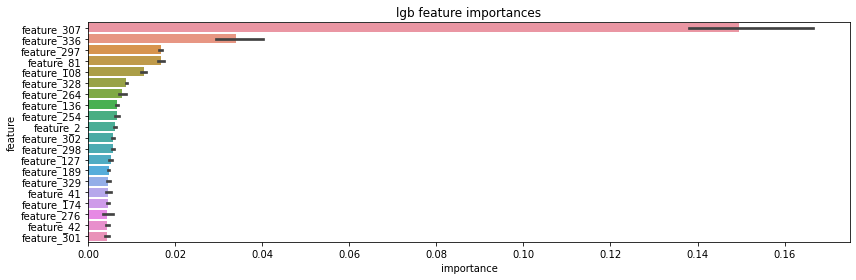

In [40]:
order = list(lgb_importances.groupby("feature").mean().sort_values("importance", ascending=False).index)
plt.figure(figsize=(12, 4), tight_layout=True)
sns.barplot(x="importance", y="feature", data=lgb_importances, order=order[:20])
plt.title("{} feature importances".format("lgb"))
plt.tight_layout()

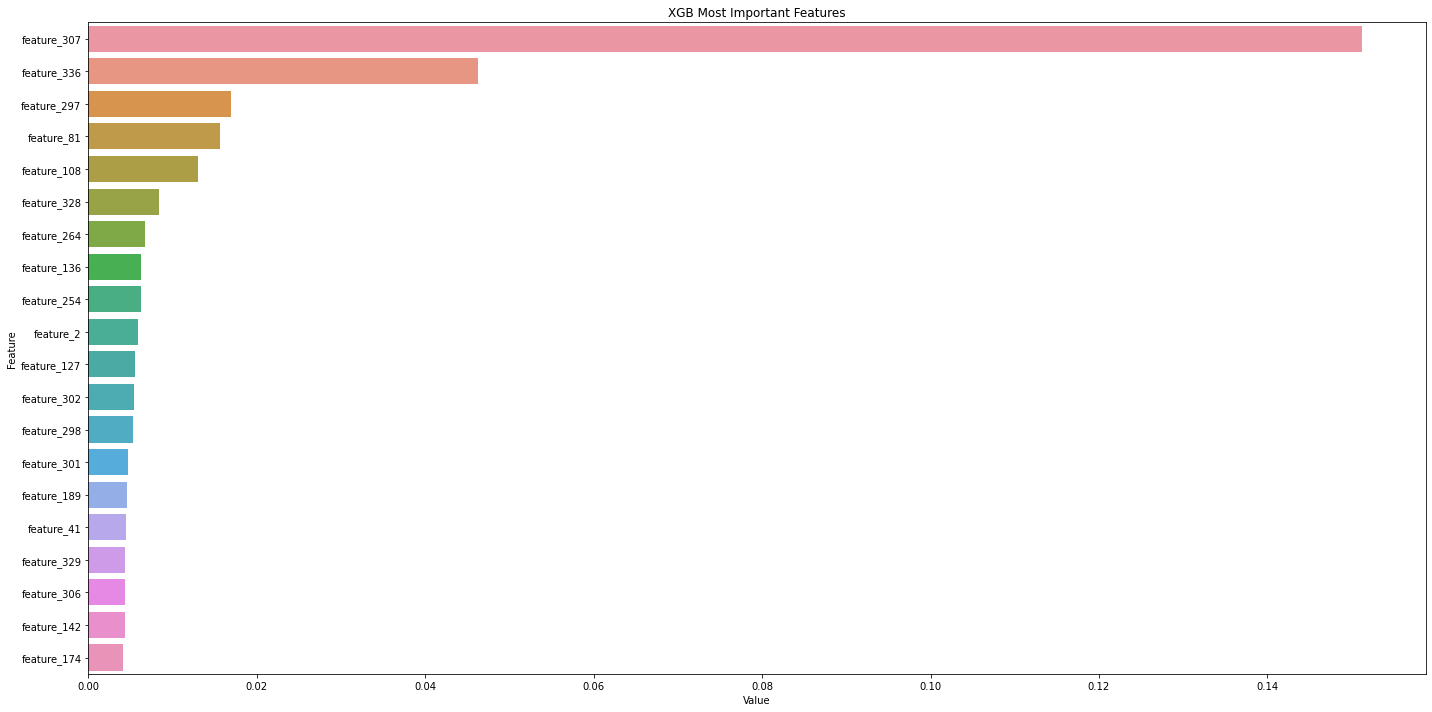

In [41]:
cols = list(X_train.columns)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,cols)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:20])
plt.title('XGB Most Important Features')
plt.tight_layout()
plt.show()

# Submission

In [42]:
sub['target'] = pred
sub.to_csv('xgb_submission.csv', index = False)

sub

,id,target
0,5,0.302264
1,7,0.328243
2,9,0.316948
3,11,0.120210
4,14,0.224041
...,...,...
29995,99981,0.566622
29996,99982,0.279447
29997,99992,0.147138
29998,99993,0.593314


In [43]:
sub.describe()

,id,target
count,30000.000000,30000.000000
mean,49939.343600,0.297260
std,28842.324835,0.215415
min,5.000000,0.025565
25%,25001.000000,0.124087
50%,49944.500000,0.214175
75%,74931.500000,0.452202
max,99995.000000,0.939548
